In [1]:
!pip install -qU langchain-groq langchain langchain_core "langchain-chroma>=0.1.2" langchain_community sentence_transformers fastembed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 67.9 MB/s eta 0:00

In [3]:
# groq API Below
# 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

In [2]:
import getpass
import os
os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

Enter your Groq API key: ··········


In [4]:
from langchain_groq import ChatGroq
from langchain_chroma import Chroma
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.pydantic_v1 import BaseModel
from langchain_core.runnables import RunnableParallel, RunnablePassthrough
from langchain_text_splitters import RecursiveCharacterTextSplitter, CharacterTextSplitter
from sentence_transformers import SentenceTransformer
from langchain.embeddings.base import Embeddings
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
model = ChatGroq(
    model = "mixtral-8x7b-32768",
    temperature = 0,
    max_tokens = None,
    timeout=None,
    max_retries = 2
)

In [6]:
from langchain_community.document_loaders import WebBaseLoader
import bs4

In [7]:
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)

In [8]:
docs = loader.load()

In [9]:
docs

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistake

In [10]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)


In [11]:
splits[0]

Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refin

In [12]:
embeddings = FastEmbedEmbeddings(model_name="BAAI/bge-base-en-v1.5")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

model_optimized.onnx:   0%|          | 0.00/218M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/740 [00:00<?, ?B/s]

In [13]:
vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)

In [14]:
retriever = vectorstore.as_retriever()

In [15]:
from langchain import hub

In [16]:
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY'] = '______________'

In [17]:
prompt = hub.pull("rlm/rag-prompt")

In [18]:
prompt

ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})])

In [19]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [20]:
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

In [21]:
rag_chain.invoke("what are agent systems?")

'Agent systems, as discussed in the context, refer to systems that use large language models (LLMs) as their core controller for decision-making. These systems are designed to handle complex tasks by breaking them down into smaller, manageable subgoals. They also have the ability to reflect on past actions, learn from mistakes, and refine strategies for future steps. The context also mentions the use of natural language interfaces in these systems, which can be unreliable due to formatting errors and occasional rebellious behavior of LLMs.'

In [22]:
retriever.invoke("what are agent systems?")

[Document(id='d69ebc68-1f39-4524-9053-133d4f549e9b', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.'),
 Document(id='747d3c92-55de-4e1f-86d8-d6bffbcd18a2', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Fig. 13. The generative agent architecture. (Image source: Park et al. 2023)\nThis fun simulation 

In [23]:
vectorstore = Chroma.from_documents(
    documents=splits,
    collection_name="rag-private",
    embedding= embeddings,
)

In [24]:
QUERY_PROMPT = PromptTemplate(
    input_variables=["question"],
    template="""You are an AI language model assistant. Your task is to generate five
    different versions of the given user question to retrieve relevant documents from
    a vector database. By generating multiple perspectives on the user question, your
    goal is to help the user overcome some of the limitations of the distance-based
    similarity search. Provide these alternative questions separated by newlines.
    Original question: {question}""",
)

In [25]:
retriever = MultiQueryRetriever.from_llm(
    vectorstore.as_retriever(),
    llm=model,
    prompt= QUERY_PROMPT
)

In [26]:
import logging

logging.basicConfig()
logging.getLogger("langchain.retrievers.multi_query").setLevel(logging.INFO)

In [27]:
template = """Answer the question based only on the following context:
{context}
Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

In [28]:
chain = (
    RunnableParallel({"context": retriever, "question": RunnablePassthrough()})
    | prompt
    | model
    | StrOutputParser()
)

In [29]:
response = chain.invoke("what are agent systems?")

INFO:langchain.retrievers.multi_query:Generated queries: ['1. Can you explain the concept of agent-based systems?', '2. What are the key components and functionalities of agent systems?', '3. How do agent systems work and what are their applications?', '4. What is the role of agents in distributed systems, referred to as agent systems?', '5. Can you provide information on the architecture and design of agent-based systems?']


In [30]:
response

"Based on the provided document, an agent system is a type of autonomous system that is powered by a large language model (LLM) as its core controller. It consists of several key components, including planning, subgoal and decomposition, reflection and refinement, and memory. The LLM functions as the agent's brain, enabling it to handle complex tasks by breaking them down into smaller, manageable subgoals, learning from past actions, and improving the quality of final results. Examples of LLM-powered agent systems include AutoGPT, GPT-Engineer, and BabyAGI."

In [31]:
from langchain.chains.query_constructor.base import AttributeInfo
from langchain.retrievers.self_query.base import SelfQueryRetriever

In [32]:
loader = WebBaseLoader(["https://lilianweng.github.io/posts/2023-06-23-agent/", "https://lilianweng.github.io/posts/2024-07-07-hallucination/"])
data = loader.load()

In [33]:
for doc in data:
  print(doc.metadata)

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\

In [34]:
metadata_field_info = [
    AttributeInfo(
        name="source",
        description="The web url of the web page",
        type="string",
    ),
    AttributeInfo(
        name="title",
        description="The title of the web page",
        type="string",
    ),
    AttributeInfo(
        name="description",
        description="Description regarding the page contents",
        type="string",
    ),
    AttributeInfo(
        name="language", description="Langugae of the contents in abbreviated form for example en for English etc.", type="string"
    ),
]

In [35]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
all_splits = text_splitter.split_documents(data)

In [53]:
!pip install lark

In [54]:
vectorstore = Chroma.from_documents(all_splits, embeddings)


In [55]:
document_conent_description = "web pages about LLMs"

In [97]:
retriever = SelfQueryRetriever.from_llm(
    model, vectorstore, document_conent_description, metadata_field_info, verbose=True
)

ImportError: Cannot import lark, please install it with 'pip install lark'.

In [57]:
retriever.invoke("What are few of the use cases for agent systems?")


INFO:langchain.retrievers.multi_query:Generated queries: ['1. "Can you provide some examples of applications for intelligent agents?"', '2. "What are some real-world scenarios where agent systems are utilized?"', '3. "What are the main use cases of multi-agent systems in practical settings?"', '4. "In what ways are agent systems employed across different industries?"', '5. "Could you list a few instances where agent systems have proven beneficial?"']


[Document(id='bcda3d28-05e1-48a5-96ca-3292274799f8', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='}\n]\nChallenges#\nAfter going through key ideas and demos of building LLM-centered agents, I start to see a couple common limitations:'),
 Document(id='adc268a2-c11b-45c3-b804-e0308538b5a2', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Fig. 13. The generative agent architecture. (Image source: Park et al. 2023)\nThis fun simulation results in emergent social behavior, such as information diffusion, relationship memory (e.g. two agents continuing the conversation topic) and coordination of social events (e.g. host a party and invite many others).\nProof-of-Concept Examples#\nAutoGPT has drawn a lot of attention into the possibility of setting up autonomous agents with LLM as the main controller. It has quite a lot of reliability issues given the natural language interface, but nevertheless a cool pr

# ***Agentic Code***

In [59]:
!pip install langgraph
!pip install langchain-groq
!pip install langchain langchain_core langchain_community fastembed

In [60]:
def function_1(input_1):
  return input_1 + " First Function"

def function_2(input_2):
  return input_2 + " to Second Function"


In [61]:
from langgraph.graph import Graph

workflow = Graph()

workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)
workflow.add_edge("node_1", "node_2")

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

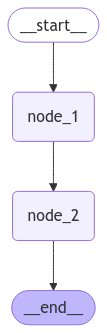

In [62]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [63]:
app.invoke("Starting from")

'Starting from First Function to Second Function'

In [64]:
input = 'Moving from'
for output in app.stream(input):
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'node_1':
---
Moving from First Function

---

Output from node 'node_2':
---
Moving from First Function to Second Function

---



In [66]:
#groq API Below
# 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

In [67]:
import getpass
import os
os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API key: ")

Enter your Groq API key: ··········


In [68]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model="mixtral-8x7b-32768",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

In [69]:
def function_1(input_1):
  complete_query = "Your task is to provide only the topic based on the user query.\
  Only output the topic among: [Finance,Legal]. Do not include reasoning. Following is the user query: " + input_1
  response = llm.invoke(complete_query)
  return response

def function_2(input_2):
  topic = f"Here is the topic :{input_2}"
  return topic

In [70]:
from langgraph.graph import Graph

workflow = Graph()

workflow.add_node("Agent", function_1)
workflow.add_node("tool", function_2)
workflow.add_edge("Agent", "tool")

workflow.set_entry_point("Agent")
workflow.set_finish_point("tool")

app = workflow.compile()

In [71]:
app.invoke("The finanical report of google this year showed massive revenue generation")

"Here is the topic :content='Finance' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 2, 'prompt_tokens': 59, 'total_tokens': 61, 'completion_time': 0.001568676, 'prompt_time': 0.004151704, 'queue_time': 0.238162044, 'total_time': 0.00572038}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'stop', 'logprobs': None} id='run-c927df28-2170-4cbd-be87-08965e91bb1e-0' usage_metadata={'input_tokens': 59, 'output_tokens': 2, 'total_tokens': 61}"

In [72]:
!pip install "langchain-chroma>=0.1.2"

In [73]:
import bs4

In [74]:
from langchain_groq import ChatGroq
from langchain_chroma import Chroma
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.pydantic_v1 import BaseModel
from langchain_core.runnables import RunnableParallel, RunnablePassthrough
from langchain_text_splitters import RecursiveCharacterTextSplitter, CharacterTextSplitter
from langchain.embeddings.base import Embeddings
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings

In [75]:
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)

docs = loader.load()

In [76]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=10,
    length_function=len
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [77]:
embeddings = FastEmbedEmbeddings(model_name="BAAI/bge-base-en-v1.5")

In [78]:
db = Chroma.from_documents(new_docs, embeddings)
retriever = db.as_retriever(search_kwargs={"k": 4})

In [79]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain.chains import RetrievalQA

In [80]:
AgentState = {}
AgentState["messages"] = []

In [81]:
AgentState

{'messages': []}

In [82]:
def function_1(state):
    messages = state['messages']
    question = messages[-1]

    complete_query = "Your task is to provide only the topic based on the user query. \
        Only output the topic among: [Agents , Sports]. def Don't include reasoning. Following is the user query: " + question
    response = llm.invoke(complete_query)
    state['messages'].append(response.content)
    return state

def function_2(state):
    messages = state['messages']
    question = messages[0]

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = chain.invoke(question)
    return result

In [83]:
from langgraph.graph import Graph

workflow = Graph()

workflow.add_node("Agent", function_1)
workflow.add_node("tool", function_2)
workflow.add_edge("Agent", "tool")

workflow.set_entry_point("Agent")
workflow.set_finish_point("tool")

app = workflow.compile()

In [84]:
inputs = {"messages": ["Tell me about agents"]}
app.invoke(inputs)

'Based on the provided context, an agent is a system that can perform tasks or solve problems. It is often used in the context of a complex task that involves multiple steps. An agent needs to be aware of these steps and plan accordingly. Additionally, an agent can have a list of experiences in natural language.\n\nHowever, the context does not provide a detailed explanation of what agents are, their types, or their capabilities. For a more comprehensive understanding of agents, it would be necessary to consult additional sources.'

In [85]:
def function_1(state):
    messages = state['messages']
    question = messages[-1]

    complete_query = "Your task is to provide only the topic based on the user query. \
        Only output the topic among: [Agents , Sports, Not Related]. def Don't include reasoning. Following is the user query: " + question
    response = llm.invoke(complete_query)
    state['messages'].append(response.content)
    return state

def function_2(state):
    messages = state['messages']
    question = messages[0]

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = chain.invoke(question)
    return result

def function_3(state):
  messages = state["messages"]
  question = messages[0]
  query = "Answer the following question with your knowledge of the real world. Following is the question: " + question
  response = llm.invoke(query)
  return {"messages": [response.content]}

def router(state):
  messages = state["messages"]
  last_message = messages[-1]
  print(last_message)
  if "Agent" in last_message or "Sports" in last_message:
    return 'RAG Call'
  else:
    return 'LLM Call'



In [86]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [87]:
from langgraph.graph import Graph, StateGraph, END

graph = StateGraph(AgentState)
graph.add_node("agent", function_1)
graph.add_node("RAG", function_2)
graph.add_node("LLM", function_3)

graph.set_entry_point("agent")

graph.add_conditional_edges(
    "agent",
    router,
    {
        "RAG Call" : "RAG",
        "LLM Call" : "LLM"
    }
)

graph.add_edge("RAG", END)
graph.add_edge("LLM", END)
app = graph.compile()

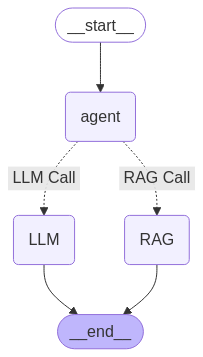

In [88]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [96]:
inputs = {"messages": ["what is agentic ai"]}
app.invoke(inputs)

Agents


InvalidUpdateError: Expected dict, got Based on the provided context, Agentic AI refers to autonomous agents that can make decisions independently without seeking user assistance. These agents are powered by large language models (LLMs) and can exhibit emergent social behavior, such as information diffusion, relationship memory, and coordination of social events. An example of such an agent is AutoGPT, which has drawn attention as a proof-of-concept demo, although it has some reliability issues due to its natural language interface.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE